## **Machine Learning Attempt 2: Upsampling**

In this notebook, we attempt to improve the first machine learning model by upsampling to reduce FNR as the majority of `Survived` is 0.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
machine_learning_data_ohe = pd.read_csv("datasets\\machine-learning-data-ohe.csv")
machine_learning_data_ohe = machine_learning_data_ohe[['Pclass', 'Alone', 'Fare', 'Parch', 'Family_Size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]
machine_learning_data_ohe

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0
1,1,0,71.2833,0,2,1.0,0.0,1.0,0.0,0.0,1
2,3,1,7.9250,0,1,1.0,0.0,0.0,0.0,1.0,1
3,1,0,53.1000,0,2,1.0,0.0,0.0,0.0,1.0,1
4,3,1,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,13.0000,0,1,0.0,1.0,0.0,0.0,1.0,0
887,1,1,30.0000,0,1,1.0,0.0,0.0,0.0,1.0,1
888,3,0,23.4500,2,4,1.0,0.0,0.0,0.0,1.0,0
889,1,1,30.0000,0,1,0.0,1.0,1.0,0.0,0.0,1


In [6]:
from sklearn.utils import resample

never_survive = machine_learning_data_ohe[machine_learning_data_ohe.Survived == 0]
survive = machine_learning_data_ohe[machine_learning_data_ohe.Survived == 1]
 
survive_up = resample(survive, replace=True, n_samples=never_survive.shape[0])
 
machine_learning_data_ohe_up = pd.concat([never_survive, survive_up])
 
machine_learning_data_ohe_up['Survived'].value_counts()

0    549
1    549
Name: Survived, dtype: int64

We have upsampled the data to reduce the imbalanced ratio of Survived:Not Survived

[Text(0.49107142857142855, 0.9, 'Sex_female <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [379, 389]\nclass = 1'),
 Text(0.26785714285714285, 0.7, 'Fare <= 10.817\ngini = 0.376\nsamples = 431\nvalue = [323, 108]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'Fare <= 7.91\ngini = 0.198\nsamples = 198\nvalue = [176, 22]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'Fare <= 6.962\ngini = 0.113\nsamples = 116\nvalue = [109, 7]\nclass = 0'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'gini = 0.13\nsamples = 100\nvalue = [93, 7]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'Fare <= 7.988\ngini = 0.299\nsamples = 82\nvalue = [67, 15]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = 1'),
 Text(0.25, 0.1, 'gini = 0.219\nsamples = 72\nvalue = [63, 9]\nclass = 0'),
 Text(0.39285714285714285, 0.5, 'Family_Size <= 4.5\ngini = 0.466\nsamples = 233\nvalue = [147, 86]\nclass = 

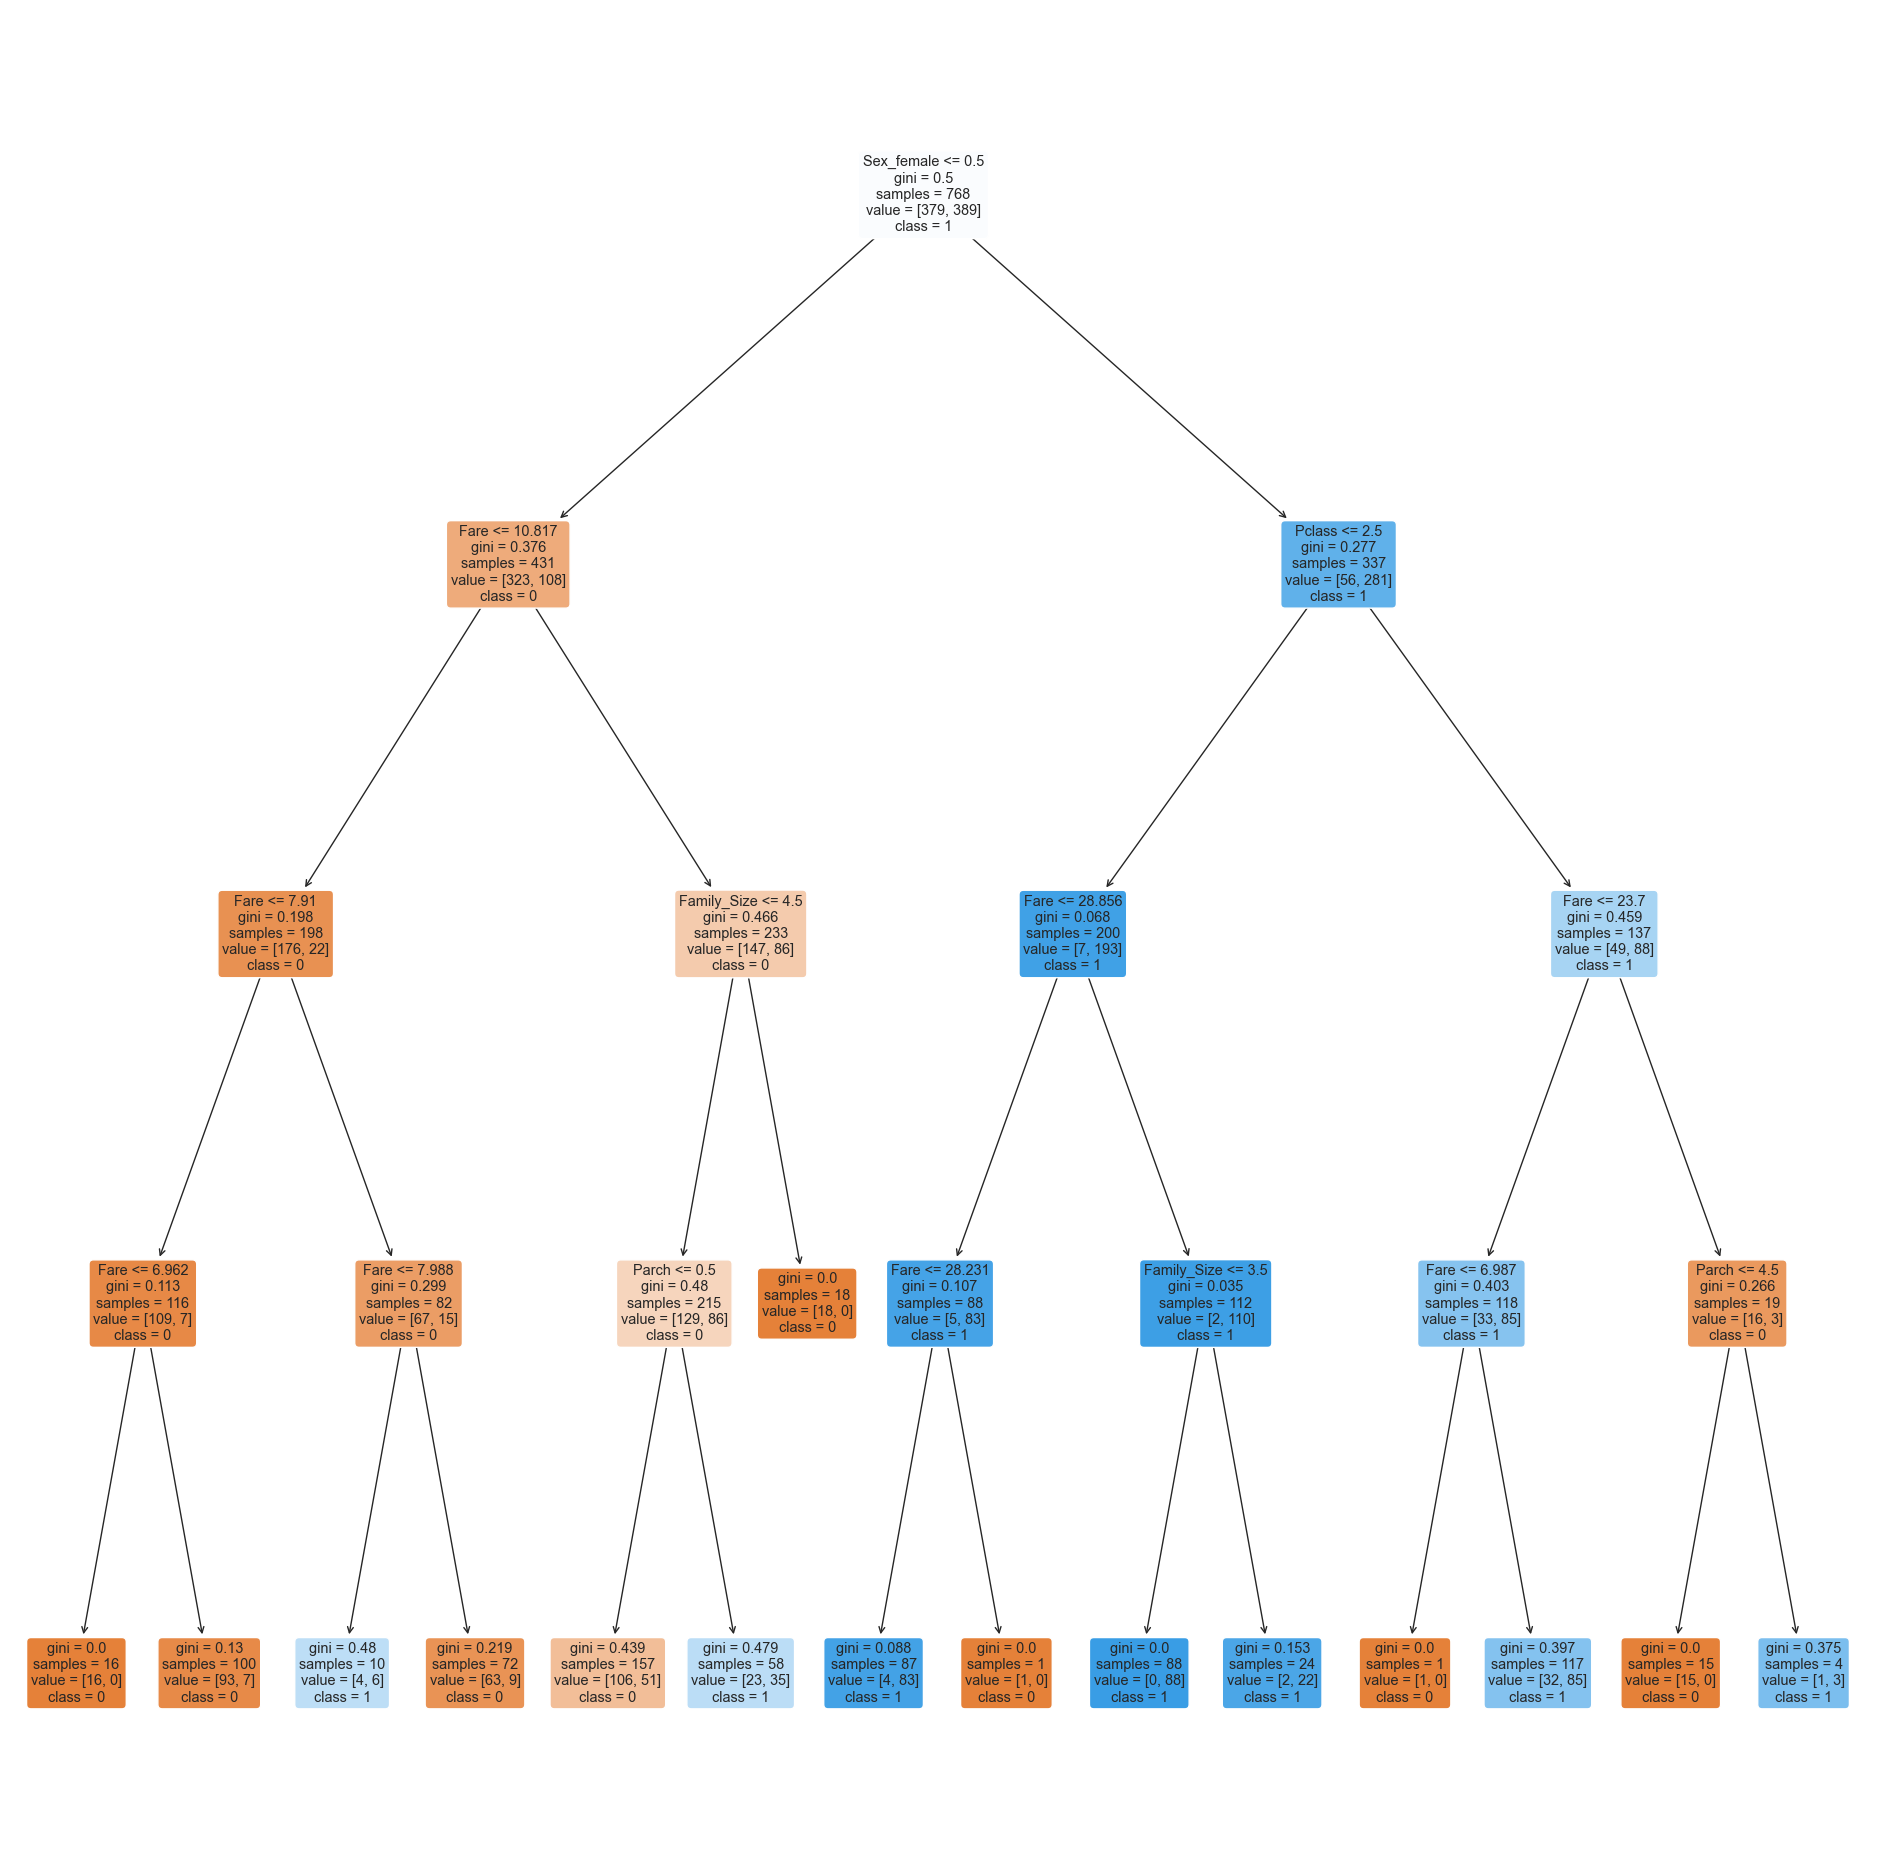

In [7]:
y = pd.DataFrame(machine_learning_data_ohe_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

Train Data
Accuracy  :	 0.8268229166666666

TPR Train :	 0.8277634961439588
TNR Train :	 0.8258575197889182

FPR Train :	 0.1741424802110818
FNR Train :	 0.17223650385604114


<AxesSubplot:>

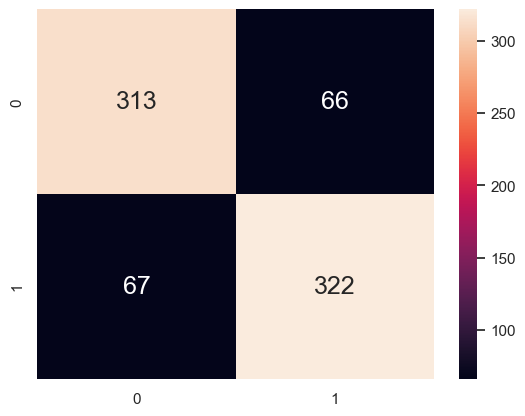

In [8]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7666666666666667

TPR Test :	 0.73125
TNR Test :	 0.8

FPR Test :	 0.2
FNR Test :	 0.26875


<AxesSubplot:>

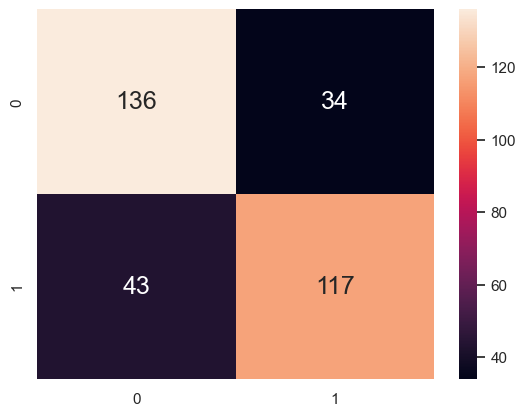

In [9]:
from sklearn.metrics import confusion_matrix

y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

After upsampling and introducing more data points to people that survived, we can see that the overall accuracy of the train set is still the same at 82.6%, and the test set has dropped slightly from 79.8% to 76.7%. However, the FNR of both sets have been greatly reduced by around half and the TPR of both sets have been greatly increased as well.

However, the overall accuracy can still be improved, which we attempt to use Random Forest in our third attempt.

In [10]:
machine_learning_data_ohe_up.to_csv("datasets\\machine-learning-data-ohe-upsampled.csv")

The OneHotEncoded and upsampled machine learning data has been exported to the `machine-learning-data-ohe-upsampled.csv` in the `datasets` folder.